## Data

An experiment was conducted on 5000 participants to study the effects of age and physical health on hearing loss, specifically the ability to hear high pitched tones. This data displays the result of the study in which participants were evaluated and scored for physical ability and then had to take an audio test (pass/no pass) which evaluated their ability to hear high frequencies. The age of the user was also noted. Is it possible to build a model that would predict someone's liklihood to hear the high frequency sound based solely on their features (age and physical score)?

* Features

    * age - Age of participant in years
    * physical_score - Score achieved during physical exam

* Label/Target

    * test_result - 0 if no pass, 1 if test passed

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
df=pd.read_csv("C:\\Users\\parth\\OneDrive\\Desktop\\parth\\Machine-learning\\Machine-learning\\DATA\\hearing_test.csv")

In [3]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [4]:
df.describe()

,age,physical_score,test_result
count,5000.000000,5000.000000,5000.000000
mean,51.609000,32.760260,0.600000
std,11.287001,8.169802,0.489947
min,18.000000,-0.000000,0.000000
25%,43.000000,26.700000,0.000000
50%,51.000000,35.300000,1.000000
75%,60.000000,38.900000,1.000000
max,90.000000,50.000000,1.000000


In [5]:
df['test_result'].value_counts()

test_result
1    3000
0    2000
Name: count, dtype: int64

<Axes: xlabel='test_result', ylabel='count'>

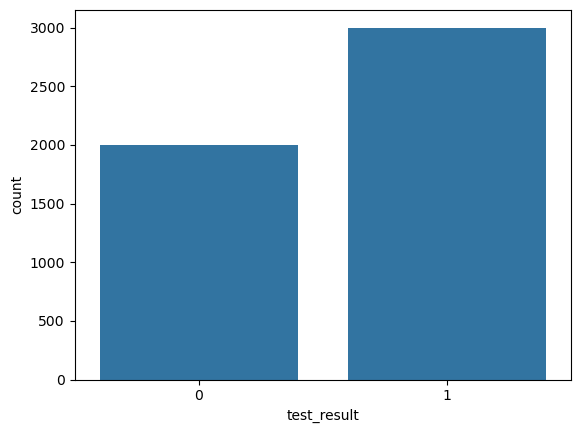

In [6]:
sns.countplot(data=df,x='test_result')

<Axes: xlabel='test_result', ylabel='age'>

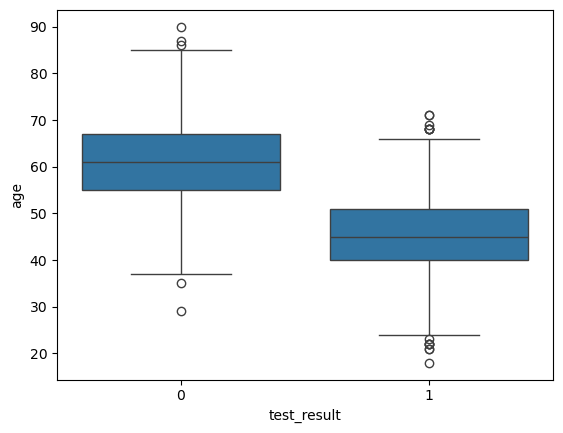

In [7]:
sns.boxplot(data=df,x='test_result',y='age') # it showing more u get older ur hearing capacity also become less

<Axes: xlabel='test_result', ylabel='physical_score'>

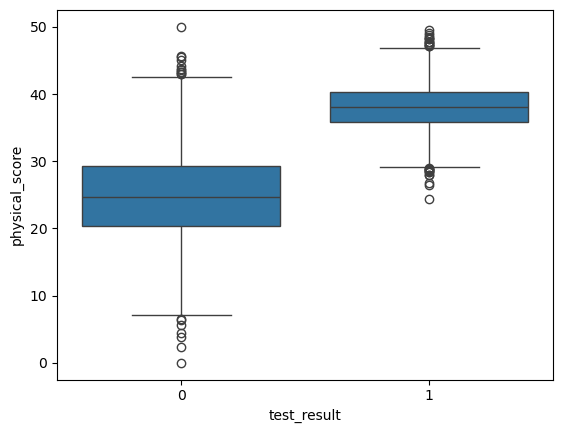

In [8]:
sns.boxplot(data=df,x='test_result',y='physical_score') # this graph show more u have physical score strong hearing capacity u have i.e u have passed the test

<Axes: xlabel='age', ylabel='physical_score'>

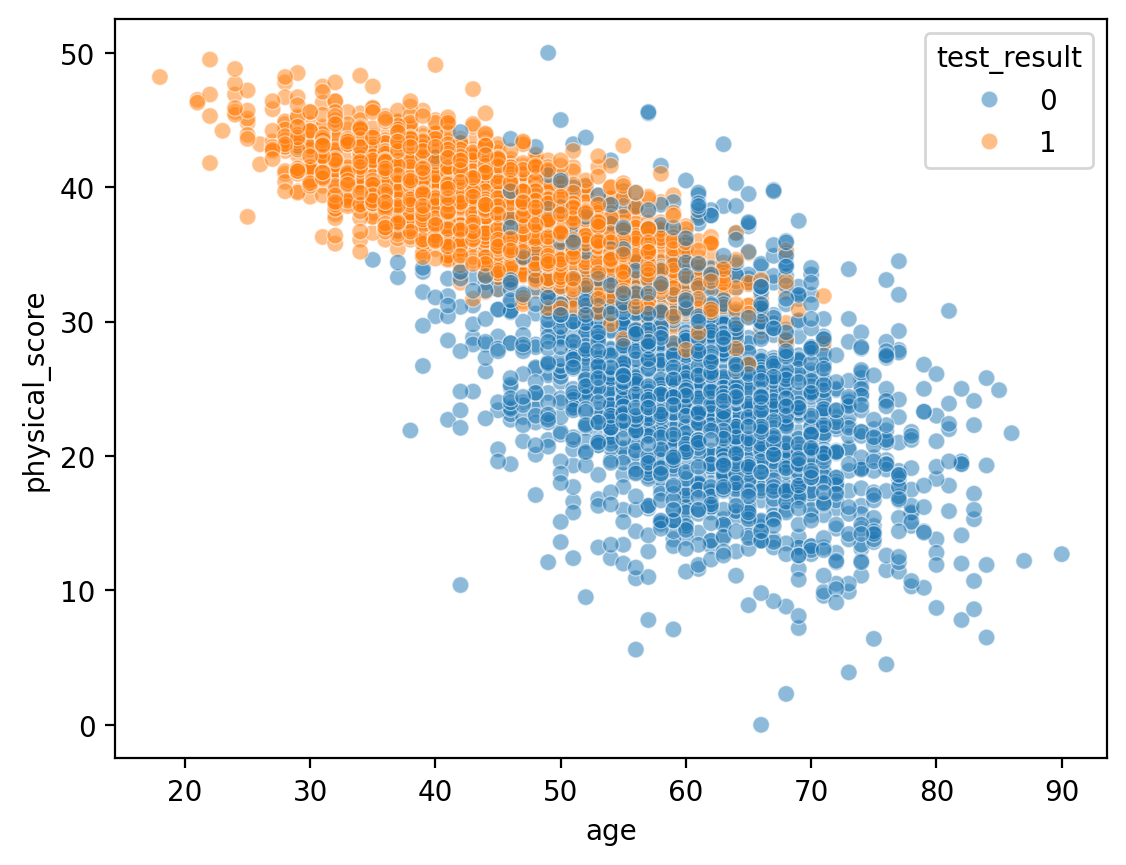

In [9]:
plt.figure(dpi=200)
sns.scatterplot(data=df,x='age',y='physical_score',hue='test_result',alpha=0.5)

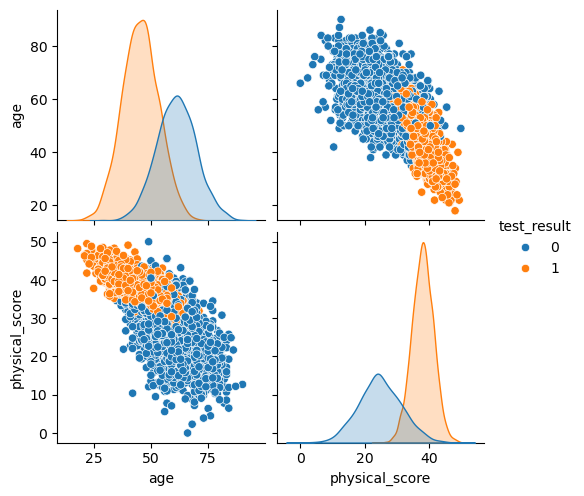

In [10]:
sns.pairplot(df,hue='test_result')

<Axes: >

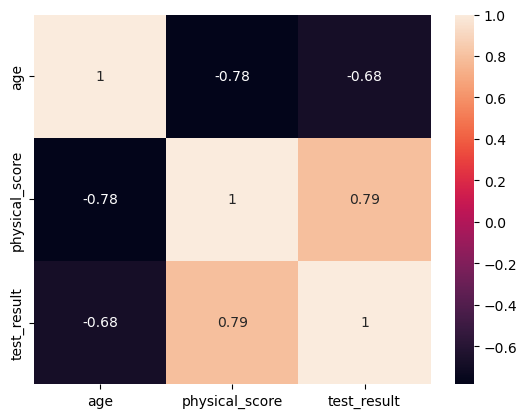

In [11]:
sns.heatmap(df.corr(),annot=True)

<Axes: xlabel='physical_score', ylabel='test_result'>

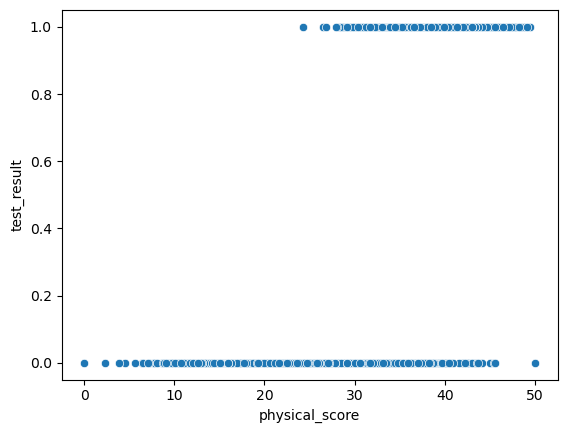

In [12]:
sns.scatterplot(data=df,x='physical_score',y='test_result')

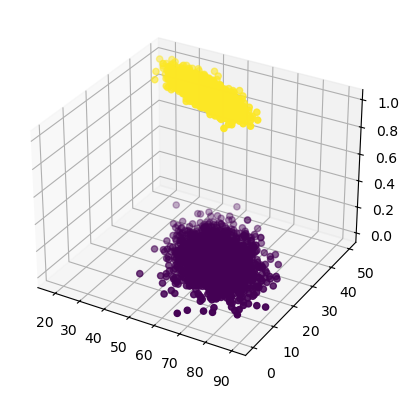

In [13]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(df['age'],df['physical_score'],df['test_result'],c=df['test_result'] )

In [14]:
X=df.drop('test_result',axis=1)

In [15]:
y=df['test_result']

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [19]:
Scaler=StandardScaler()

In [20]:
Scaled_X_train=Scaler.fit_transform(X_train)

In [21]:
Scaled_X_test=Scaler.transform(X_test)

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
help(LogisticRegression)

Help on class LogisticRegression in module sklearn.linear_model._logistic:

class LogisticRegression(sklearn.linear_model._base.LinearClassifierMixin, sklearn.linear_model._base.SparseCoefMixin, sklearn.base.BaseEstimator)
 |  LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='deprecated', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
 |
 |  Logistic Regression (aka logit, MaxEnt) classifier.
 |
 |  In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
 |  scheme if the 'multi_class' option is set to 'ovr', and uses the
 |  cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
 |  (Currently the 'multinomial' option is supported only by the 'lbfgs',
 |  'sag', 'saga' and 'newton-cg' solvers.)
 |
 |  This class implements regularized logistic regression using the
 |  'liblinear' library, 'newton-cg', 's

In [24]:
Log_model=LogisticRegression()

In [25]:
Log_model.fit(Scaled_X_train,y_train)

LogisticRegression()

In [26]:
Scaled_X_test.shape

(500, 2)

In [27]:
Log_model.coef_

array([[-0.95017725,  3.46148946]])

In [28]:
y_pred=Log_model.predict_proba(X_test)

c:\Users\parth\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [29]:
y_pred

array([[0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [1.33201672e-10, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [1.03250741e-12, 1.00000000e+00],
       [8.68667360e-11, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [8.02931494e-05, 9.99919707e-01],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [4.92547136e-09, 9.99999995e-01],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [2.60240770e-05, 9.99973976e-01],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.000000

In [30]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [31]:
y_pred=Log_model.predict(Scaled_X_test)

In [32]:
accuracy_score(y_test,y_pred)*100

93.0

In [33]:
confusion_matrix(y_test,y_pred)

array([[172,  21],
       [ 14, 293]], dtype=int64)

In [37]:
# no need to find this again there direct plot confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay


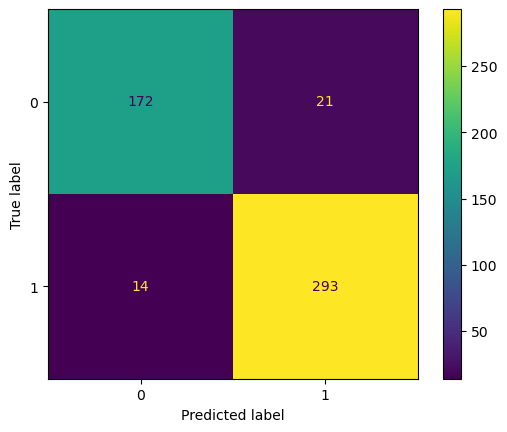

In [41]:
ConfusionMatrixDisplay.from_estimator(Log_model,Scaled_X_test,y_test)
plt.show()

In [42]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.92      0.89      0.91       193\n           1       0.93      0.95      0.94       307\n\n    accuracy                           0.93       500\n   macro avg       0.93      0.92      0.93       500\nweighted avg       0.93      0.93      0.93       500\n'

In [43]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       193
           1       0.93      0.95      0.94       307

    accuracy                           0.93       500
   macro avg       0.93      0.92      0.93       500
weighted avg       0.93      0.93      0.93       500



In [44]:
from sklearn.metrics import precision_score,recall_score

In [45]:
precision_score(y_test,y_pred)

0.9331210191082803

In [46]:
recall_score(y_test,y_pred)

0.9543973941368078

In [47]:
from sklearn.metrics import PrecisionRecallDisplay,RocCurveDisplay

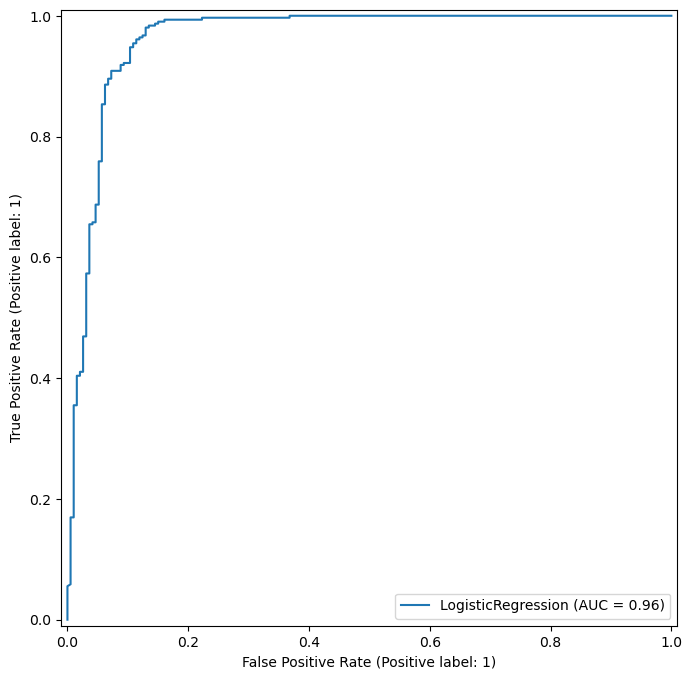

In [50]:
fig,ax=plt.subplots(figsize=(12,8))
RocCurveDisplay.from_estimator(Log_model,Scaled_X_test,y_test,ax=ax)

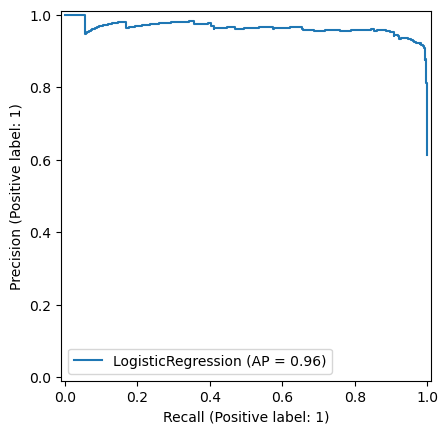

In [52]:

PrecisionRecallDisplay.from_estimator(Log_model,Scaled_X_test,y_test)

In [53]:
Log_model.predict_proba(Scaled_X_test)[0] # this is probability like 2.3% bata raha hai ki
# ye 0 Class me belong karta hai matlab not infected aur 97% 1 matlab infected

array([0.02380517, 0.97619483])

In [54]:
y_test[0]

1